
# Types of Plots

## Table of Contents

### About Visualzation
Data visualization is one of the core skills in data science. In order to start building useful models, we need to understand the underlying dataset. You will never be an expert on the data you are working with, and will always need to explore the variables in great depth before you can move on to building a model or doing something else with the data.

#### 1.1 Importing the packages


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import bokeh

%matplotlib inline

#### 1.2 Loading dataset

In [32]:
Wine1 = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/wine1.csv")

Wine2 = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/wine2.csv")

Iris  = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/Iris.csv")

wine_counts = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/top-five-wine-score-counts.csv")

#### 1.3 Dataset Info

In [34]:
print(Wine1.shape)
print(Wine2.shape)
print(Iris.shape)

frames=[Wine1, Wine2]
reviews = pd.concat(frames)
print(reviews.shape)

(75465, 10)
(75465, 10)
(150, 6)
(150930, 10)


In [35]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [36]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 1.4 BarPlots
Bar charts are arguably the simplest tool for data visualization, and they are especially useful for categorical data. They map categories to numbers.

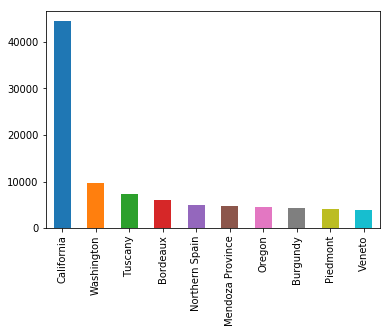

In [37]:
reviews['province'].value_counts().head(10).plot.bar()

This bar chart tells us absolute numbers, but it's more useful to know relative proportions.


(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

#California makes most of of the wines

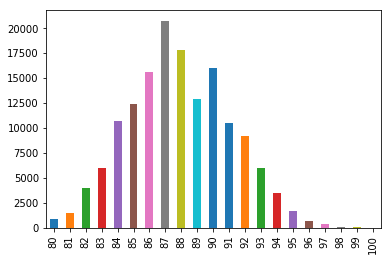

In [38]:
reviews['points'].value_counts().sort_index().plot.bar()

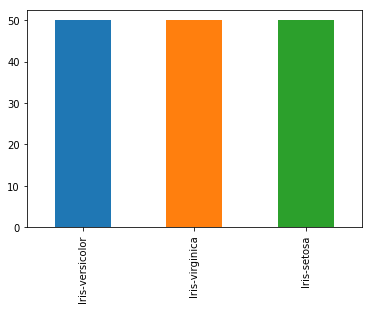

In [39]:
Iris['Species'].value_counts().plot.bar()

#### 1.5 Line Charts

The wine review scorecard has 20 unique values to fill, for which our bar chart is just barely enough. What would we do if the magazine rated things 0-100? We'd have 100 different categories; simply too many to fit a bar in for each one!

In that case, instead of bar chart, we could use a line chart.

A line chart can pass over any number of individual values, making it the tool of first choice for distributions with many unique values or categories


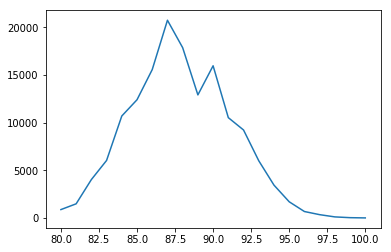

In [40]:
reviews['points'].value_counts().sort_index().plot.line()

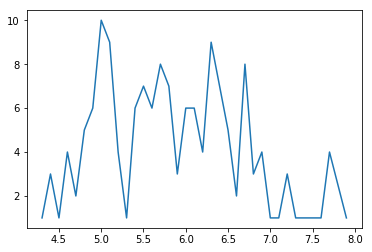

In [41]:
Iris['SepalLengthCm'].value_counts().sort_index().plot.line()

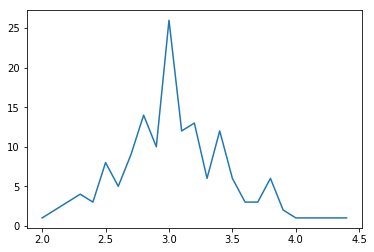

In [42]:
Iris['SepalWidthCm'].value_counts().sort_index().plot.line()

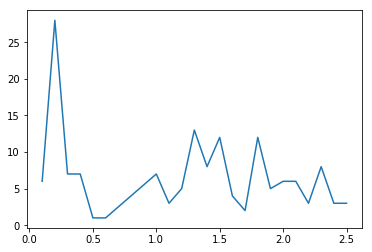

In [43]:
Iris['PetalWidthCm'].value_counts().sort_index().plot.line()

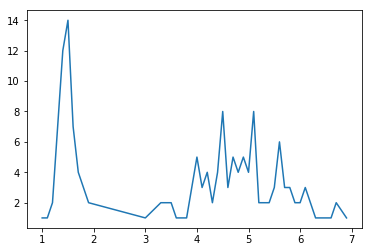

In [44]:
Iris['PetalLengthCm'].value_counts().sort_index().plot.line()


However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data.

Line charts also make it harder to distinguish between individual values.

In general, if your data can fit into a bar chart, just use a bar chart!

#### 1.6 Area Chart

Area charts are just line charts, but with the bottom shaded in. That's it!

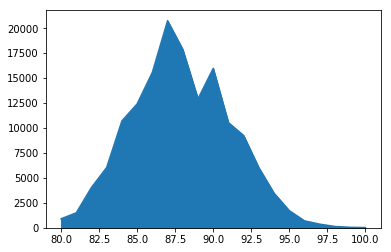

In [45]:
reviews['points'].value_counts().sort_index().plot.area()

Any variable that has infinitely many possible values is definitely an interval variable.

Line charts work well for interval data. Bar charts don't—unless your ability to measure it is very limited, interval data will naturally vary by quite a lot.

Let's apply a new tool, the histogram, to an interval variable in our dataset, price (we'll cut price off at 200$ a bottle; more on why shortly

#### 1.7 Histogram

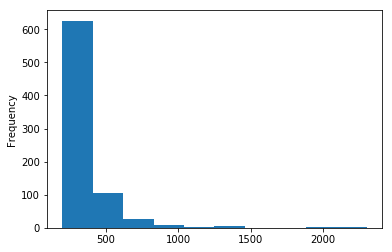

In [46]:
reviews[reviews['price'] > 200]['price'].plot.hist()

a histogram is special kind of bar plot that splits your data into even intervals and displays how many rows are in each interval with bars. The only analytical difference is that instead of each bar representing a single value, it represents a range of values.

As you can see in the above graph, most of the values lie in the range of 0 to 200 and after this, their count decreases exponentially. This phenomenon is known as skewness.
There are many ways of dealing with the skewed data problem. The easiest is to just do what we did here: cut things off at a sensible level.
Histograms work best for interval variables without skew. They also work really well for ordinal categorical variables like points:

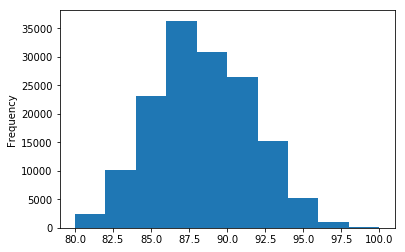

In [47]:
reviews['points'].plot.hist()

#### 1.8 Scatter Plot

The simplest bivariate plot is the scatter plot. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space. This is the result:

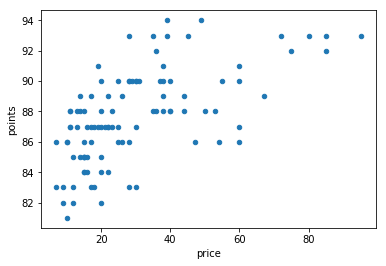

In [48]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

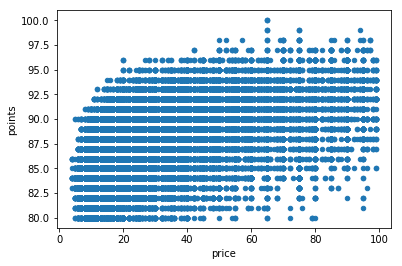

In [49]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

Scatter plot sometimes are overcrowded like a forest.

here are a few ways to treat this problem.
1) __sampling the points__. 
2) Another interesting way to do this that's built right into pandas is to use our next plot type, a hexplot.

#### 1.9 HexPlot

A hexplot aggregates points in space into hexagons, and then colorize those hexagons:

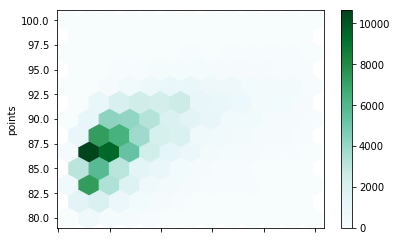

In [50]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=12)


The hexplot provides us with a much more useful view on the dataset, showing that the bottles of __wine reviewed by Wine Magazine cluster around 87.5 points and around $20__.


#### 1.20 Stacked charts
A stacked chart is one which plots the variables one on top of the other.

5877.0


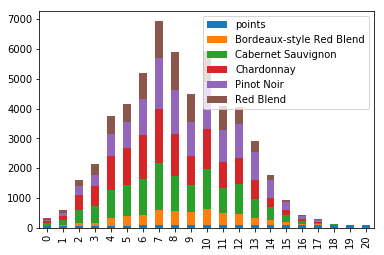

In [51]:
#We'll use a supplemental selection of the five most common wines for this next section.
#print(wine_counts.shape)
#print(wine_counts.head(10))

print(wine_counts.iloc[8,].sum())
wine_counts.plot.bar(stacked=True)


Stacked bar plots share the _strengths_ and _weaknesses_ of __univariate bar charts__. They work best for __nominal categorical__ or __small ordinal categorical variables__.

Another simple example is the area plot, which _lends itself very naturally to this form of manipulation_:


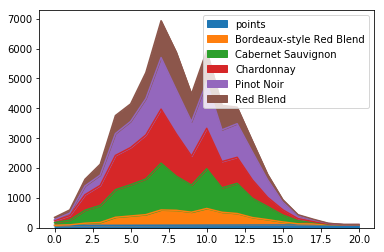

In [52]:
wine_counts.plot.area()

#### 1.10 Bivariate line chart

One plot type we've seen already that remains _highly effective_ when made is the bivariate line chart. Because the line in this chart takes up so little visual space, it's really easy and effective to overplot multiple lines on the same chart.

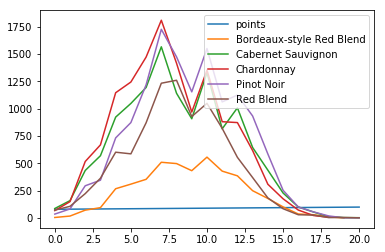

In [53]:
wine_counts.plot.line()

 Bivariate line charts are much more interpretable: we can see in this chart fairly easily that the green wine (the Chardonnay) very slightly edges out the Pinot Noir around the 87-point scoreline.

#### 1.11  Pair Plot

This will create a grid of axes such that each variable in data will be shared in y-axis across a single row and in the x-axis across a single column. The diagonal axes are treated differently, drawing a lot to show the univariate distribution of the data for the variable in that column

This is a high-level interface PairGrid that is intended to make it easy to draw a few common style. We should use PairGrid directly if we need more flexibility.

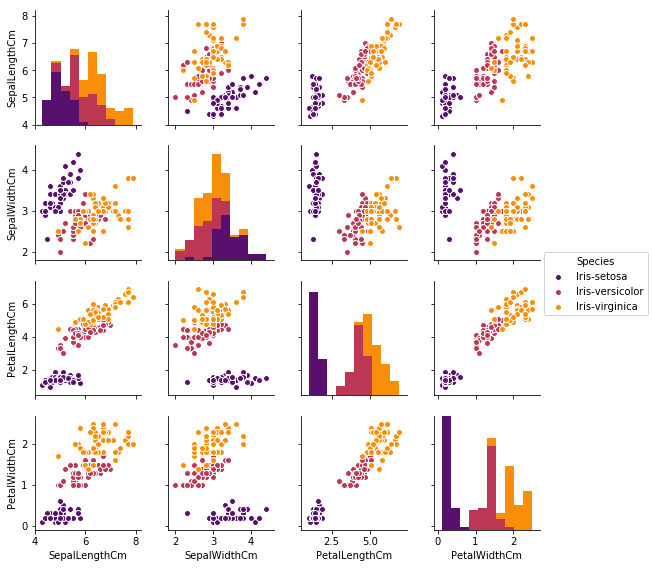

In [54]:
sns.pairplot(Iris.drop("Id", axis=1), hue='Species',palette='inferno', size=2)

#Below fig shows the bivariate relation between each pair of features. From the pairplot, 
#we can se that the Iris-sesota species is seperated from the other two across all the feature combinations.
#The _diagonal elements in a pairplot show the histogram.

we have done plotting data in one (univariate) or two (bivariate) dimensions. Now lets explore some _multivariate plotting _method that works by gridding out the data.

####  Multivariate plots

Good multivariate data displays are ones that make efficient, easily-interpretable use of these parameters.



In [55]:
pd.set_option('max_columns', None)
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/CompleteDataset.csv", index_col=0, low_memory=False)

In [56]:
footballers= df.copy()

footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0,footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'].head()
footballers['Value (M)'] = footballers['Value (M)'].astype(float)

footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)

footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


#### 1.12 Multivariate


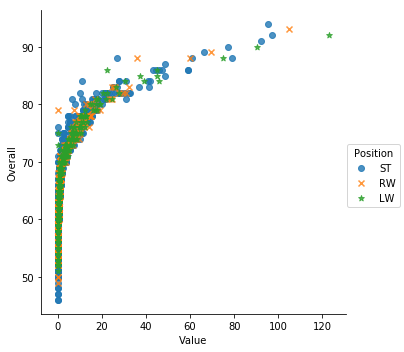

In [57]:
sns.lmplot(x='Value', y='Overall',markers=['o', 'x', '*'], hue='Position',
          data=footballers.loc[footballers['Position'].isin(['ST','RW','LW'])],
          fit_reg=False)

The horizontal position (x-value) tracks the Value of the player (how well they are paid).
The vertical position (y-value) tracks the Overall score of the player across all attributes.
And the color (the hue parameter) tracks which of the three categories of interest the player the point represents is in

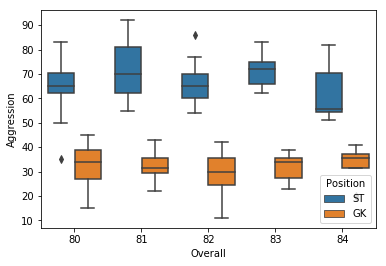

In [58]:
# Grouped box plot
# This plot takes advantage of grouping. Suppose we're interested in the following question: Do Strikers score higher on "Aggression" than Goalkeepers do?

f=(footballers
   .loc[footballers['Position'].isin(['ST','GK'])]
   .loc[:,['Value','Overall','Aggression','Position']]
  
  )
f.head()
f=f[f['Overall'] >=80]
f=f[f["Overall"] < 85]
f['Aggression']=f['Aggression'].astype(float)
sns.boxplot(x='Overall', y='Aggression', hue='Position', data=f)

As we can see, this plot demonstrates conclusively that within our datasets goalkeepers (at least, those with an overall score between 80 and 85) have _much lower Aggression scores than Strikers do_.

In this plot, the horizontal axis encodes the __Overall__ score, the vertical axis encodes the __Aggression__ score, and the grouping encodes the __Position__.

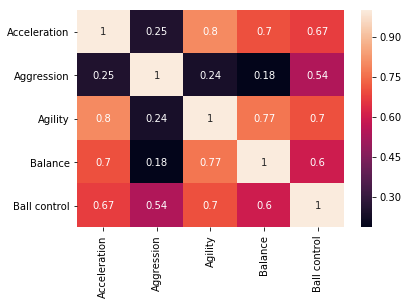

In [59]:
## Heat Map

#Probably the most heavily used summarization visualization is the correlation plot, 
#in which measures the correlation between every pair of values in a dataset and plots a result in color.

f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)


Each cell in this plot is the intersection of two variables; its color and label together indicate the amount of correlation between the two variables (how likely both variables are the increase or decrease at the same time).

Agility and Acceleration are highly correlated, while Aggression and Balanced are very uncorrelate

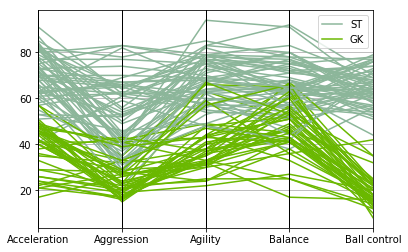

In [60]:
##Parallel Coordinates
#A __parallel coordinates plot__ provides another way of visualizing data across many variables.

from pandas.plotting import parallel_coordinates
f=(
    footballers.iloc[:,12:17]
    .loc[footballers['Position'].isin(['ST','GK'])]
    .applymap( lambda v : int(v) if str.isdecimal(v) else np.nan)
    .dropna()
  )
f['Position']=footballers['Position']
f=f.sample(100)

parallel_coordinates(f,'Position')

In the visualization above we've plotted a sample of __200 goalkeepers (in dark green) and strikers (in light green)__ across our five variables of interest.

Parallel coordinates plots are great for _determining how distinguishable different classes_ are in the data. They standardize the variables from top to bottom. In this case, we see that **strikers are almost _uniformally higher rated_ on all of the variables we've chosen**, meaning _these two classes of players are very easy to distinguish_.

In [61]:
## Swarm Plot
#It helps to draw a categorical scatterplot with non-overlapping points. 

train = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


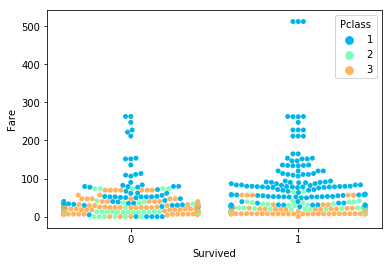

In [63]:
sns.swarmplot(x='Survived', y='Fare', hue='Pclass', palette="rainbow", data=train)

It is very obvious from chart that __Fare__ and __survival__ have a clear correlation between them. Also we can infer passengers in __Class 1__ have the _maximum probability of survival_.

In [ ]:
 #Interactive charts using Bokeh
#- Bokeh is an _interactive visualization library_ that targets modern __web browsers__ for presentation.
#- Its goal is to provide _elegant, concise construction of versatile graphics_, and to extend this capability with high-performance interactivity over very large or streaming datasets.
#- Bokeh can help anyone who would like to quickly and easily create __interactive plots, dashboards, and data applications._


In [65]:
from bokeh.plotting import Figure,figure, output_file,show,output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider, HoverTool
output_notebook()

plot=figure(plot_width=300, plot_height=300)
plot.circle(x=[1,2,3], y=[4,5,6], size=20,
              color="#FB8072", fill_alpha=0.2, line_width=2 )
slider = Slider(start=.1,end=1., value=.2,step=.1,title="delta-V")
show(plot)

Loading BokehJS ...

In [68]:
#Building interative plots with the help of slider feature of Bokeh package.
source=ColumnDataSource(dict(
x=footballers[footballers['Position'] =='CM'].Strength.tolist(),
y=footballers[footballers['Position']=='CM'].Vision.tolist(),
nationality=footballers[footballers['Position']=='CM'].Position.tolist()
))

plot=Figure(plot_width=900, plot_height=700,
           tools=[HoverTool(tooltips='@nationality', show_arrow=False)],
           x_axis_label='Strength',
            y_axis_label='Vision')

unit_list = footballers.Unit.unique().tolist()
plot.circle(x='x',y='y',fill_alpha=5, source=source,
           color='blue',
           legend='position')
plot.legend.location ='top_left'

In [69]:
from bokeh.io import push_notebook

def update_plot(number):
    positions = ['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM', 'RB', 'CF', 'RWB', 'LWB']
    new_data=dict(
        x=footballers[footballers['Position']==positions[number]].Strength.tolist(),
        y=footballers[footballers['Position']==positions[number]].Vision.tolist(),
        nationality=footballers[footballers['Position']==positions[number]].Nationality.tolist(),
        position=footballers[footballers['Position']==positions[number]].Position.tolist(),
    )
    source.data=new_data
    push_notebook()


In [70]:
from ipywidgets import interact
interact(update_plot, number=(0,14,1))
show(plot, notebook_handle=True)

interactive(children=(IntSlider(value=7, description='number', max=14), Output()), _dom_classes=('widget-interact',))